In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,mean_squared_error


With Normalisation

In [9]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [10]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
#Re-scaling images
# Changing the dimension from gray-scale to rgb
#Changing the range from [0,255] to [0,1] 

In [11]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [12]:
x_train.shape,y_train.shape

(TensorShape([58000, 32, 32, 3]), (58000,))

In [13]:
x_test.shape,y_test.shape

(TensorShape([10000, 32, 32, 3]), (10000,))

In [14]:
x_val.shape,y_val.shape

(TensorShape([2000, 32, 32, 3]), (2000,))

In [18]:
def Sequential_model():
    model = models.Sequential()
    model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
    model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
    model.add(layers.Lambda(tf.nn.local_response_normalization))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(3, strides=2))

    model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
    model.add(layers.Lambda(tf.nn.local_response_normalization))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(3, strides=2))

    model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
    model.add(layers.Activation('relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))
    model.summary()
    
    model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    return model

In [22]:
def draw_graph(history):
    fig, axs = plt.subplots(2, 1, figsize=(15,15))
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].title.set_text('Training Loss vs Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Train', 'Val'])

    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Train', 'Val'])


With Image-Rescaling:

In [19]:
model=Sequential_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda_2 (Lambda)            (None, 56, 56, 96)        0         
_________________________________________________________________
activation_5 (Activation)    (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_3 (Lambda)            (None, 7, 7, 256)        

In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

2022-04-26 00:34:11.633453: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-04-26 00:34:12.945963: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


454/454 [==============================] - 65s 127ms/step - loss: 0.4516 - accuracy: 0.8382 - val_loss: 0.1378 - val_accuracy: 0.9650
Epoch 2/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0876 - accuracy: 0.9757 - val_loss: 0.0480 - val_accuracy: 0.9895
Epoch 3/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0650 - accuracy: 0.9826 - val_loss: 0.0382 - val_accuracy: 0.9915
Epoch 4/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0545 - accuracy: 0.9852 - val_loss: 0.0578 - val_accuracy: 0.9860
Epoch 5/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0479 - accuracy: 0.9874 - val_loss: 0.0560 - val_accuracy: 0.9905
Epoch 6/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0399 - accuracy: 0.9896 - val_loss: 0.0409 - val_accuracy: 0.9895
Epoch 7/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0350 - accuracy: 0.9910 - val_loss: 0.0588 - val_accuracy: 0.9

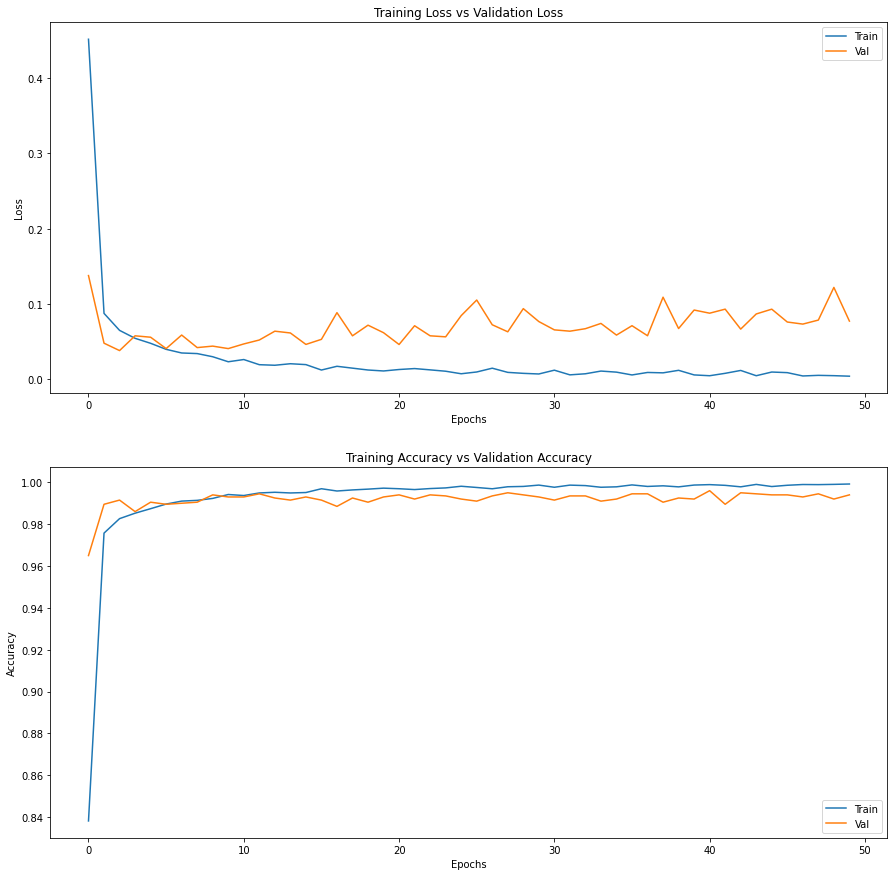

In [23]:
draw_graph(history)

In [24]:
import numpy as np
import pandas as pd

In [45]:
y_pred=model.predict(x_test).argmax(1)
y_pred_n=np.asarray(y_pred)
y_test_n=np.asarray(y_test)

In [46]:
y_pred_n=np.asarray(y_pred).reshape(-1,1)
y_test_n=np.asarray(y_test).reshape(-1,1)

In [47]:
print('Confusion Matrix:\n')
cm=confusion_matrix(y_test_n,y_pred_n)
print(cm)

Confusion Matrix:

[[ 974    0    1    1    0    2    0    0    1    1]
 [   0 1120    0    2    0    3    1    2    7    0]
 [   0    0 1022    2    0    0    1    6    1    0]
 [   0    0    0 1004    0    3    0    1    2    0]
 [   0    0    0    0  964    1    1    0    1   15]
 [   0    0    0    6    0  886    0    0    0    0]
 [   7    2    0    0    3   19  927    0    0    0]
 [   0    1    2    6    0    1    0 1013    2    3]
 [   2    0    1    4    0    3    0    0  961    3]
 [   0    1    1    1    4    8    0    2    4  988]]


Without Normalisation:

In [56]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [57]:
#No Pre-processing on data except changing the dimesnsion from gray-scale to rgb
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
#Validation Dataset
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
# Training Dataset
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [58]:
model=Sequential_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_4 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda_6 (Lambda)            (None, 56, 56, 96)        0         
_________________________________________________________________
activation_15 (Activation)   (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_7 (Lambda)            (None, 7, 7, 256)        

In [60]:
x_train.shape

TensorShape([58000, 28, 28, 3])

In [61]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
454/454 [==============================] - 59s 127ms/step - loss: 0.4879 - accuracy: 0.8270 - val_loss: 0.0460 - val_accuracy: 0.9905
Epoch 2/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0831 - accuracy: 0.9768 - val_loss: 0.0552 - val_accuracy: 0.9855
Epoch 3/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0617 - accuracy: 0.9831 - val_loss: 0.0495 - val_accuracy: 0.9900
Epoch 4/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0548 - accuracy: 0.9852 - val_loss: 0.0409 - val_accuracy: 0.9910
Epoch 5/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0382 - accuracy: 0.9903 - val_loss: 0.0363 - val_accuracy: 0.9925
Epoch 6/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0383 - accuracy: 0.9899 - val_loss: 0.0581 - val_accuracy: 0.9880
Epoch 7/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.0373 - val_ac

Confusion Matrix without Normalisation:

[[ 978    0    2    0    0    0    0    0    0    0]
 [   0 1131    0    0    0    0    1    2    1    0]
 [   0    0 1015    1    0    0    1   11    4    0]
 [   0    0    1  995    0    7    0    5    1    1]
 [   1    0    1    0  970    0    1    0    0    9]
 [   2    0    0    7    0  879    2    0    2    0]
 [   6    2    1    0    1    0  948    0    0    0]
 [   0    1    1    0    0    0    0 1026    0    0]
 [   1    0    1    1    0    0    3    2  959    7]
 [   0    1    1    0    7    1    0    0    3  996]]


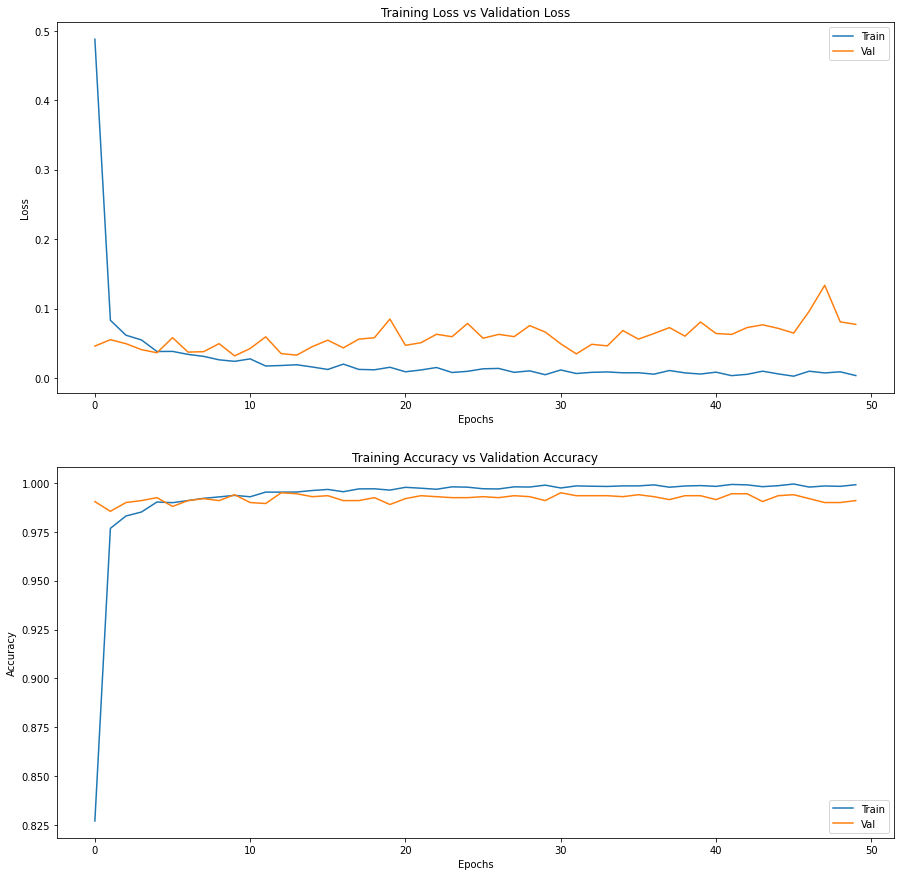

In [62]:
draw_graph(history)
y_pred=model.predict(x_test).argmax(1)
y_pred_n=np.asarray(y_pred).reshape(-1,1)
y_test_n=np.asarray(y_test).reshape(-1,1)
print('Confusion Matrix without Normalisation:\n')
cm=confusion_matrix(y_test_n,y_pred_n)
print(cm)

In [63]:
score=model.evaluate(x_test, y_test)
print("Accuracy Score:",score[1])
print("Loss:",score[0])

313/313 [==============================] - 4s 14ms/step - loss: 0.0966 - accuracy: 0.9897
Accuracy Score: 0.9897000193595886
Loss: 0.0966033786535263


In [68]:
print("f1-Score:",f1_score(y_test_n,y_pred_n, average=None).reshape(-1,1))

f1-Score: [[0.99390244]
 [0.99647577]
 [0.98783455]
 [0.98808342]
 [0.98979592]
 [0.98819562]
 [0.99059561]
 [0.98939248]
 [0.98662551]
 [0.9851632 ]]


Standardisation:

In [69]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [70]:
#Find the Mean And Standard Deviation
ds_mean = tf.zeros([28,28, 1], tf.float32)
for image in x_train:
    ds_mean += tf.cast(image, tf.float32)
ds_mean /= len(x_train)

ds_stddev = tf.zeros([28, 28, 1], tf.float32)
for image in x_train:
    ds_stddev += tf.square(tf.cast(image, tf.float32) - ds_mean)
ds_stddev /= len(x_train)
ds_stddev = tf.sqrt(ds_stddev)

In [71]:
#Applying Standardisation Formula:
for image in x_train:
    image=(image-ds_mean)/ds_stddev

In [72]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
#Validation Dataset
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
# Training Dataset
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [73]:
x_train.shape

TensorShape([58000, 28, 28, 3])

In [74]:
model=Sequential_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_5 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda_8 (Lambda)            (None, 56, 56, 96)        0         
_________________________________________________________________
activation_20 (Activation)   (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_9 (Lambda)            (None, 7, 7, 256)        

In [76]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0837 - val_accuracy: 0.9925
Epoch 2/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0112 - accuracy: 0.9978 - val_loss: 0.0784 - val_accuracy: 0.9940
Epoch 3/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.1689 - val_accuracy: 0.9920
Epoch 4/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.1055 - val_accuracy: 0.9930
Epoch 5/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.1045 - val_accuracy: 0.9940
Epoch 6/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.1256 - val_accuracy: 0.9905
Epoch 7/50
454/454 [==============================] - 58s 127ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.1055 - val_ac

In [83]:

import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import itertools
def plot_confusion_matrix( cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
        f3 = plt.figure(3)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd' 
        thresh = cm.max()/2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('predicted label')
            f3.show()

[[ 979    0    0    0    0    0    0    0    0    1]
 [   0 1132    1    0    0    0    0    1    1    0]
 [   0    0 1023    1    0    0    0    5    3    0]
 [   0    0    1 1002    0    3    0    1    2    1]
 [   0    0    0    0  965    0    1    0    2   14]
 [   1    0    0    4    0  884    2    0    1    0]
 [   1    3    1    0    1    6  945    0    1    0]
 [   0    1    3    2    0    0    0 1013    0    9]
 [   3    1    2    1    1    2    0    0  959    5]
 [   0    2    0    0    3    2    0    0    2 1000]]


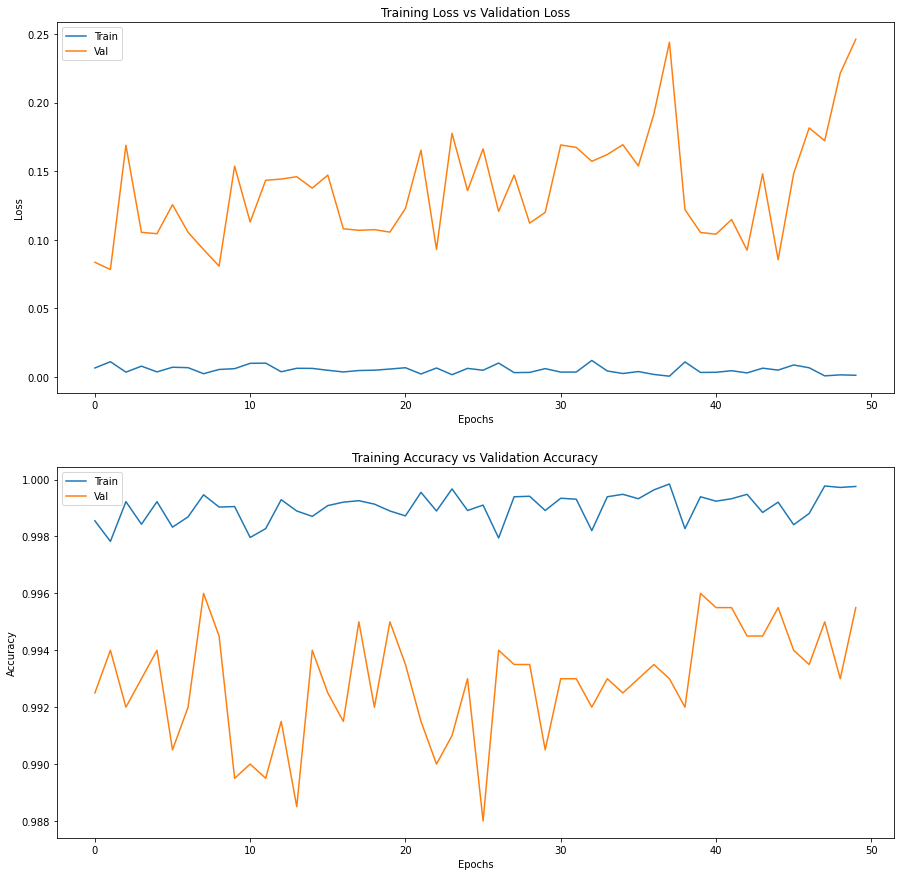

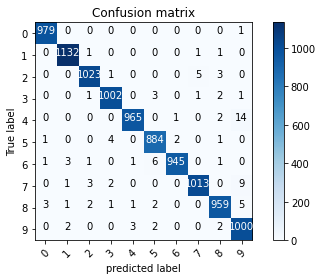

In [85]:
draw_graph(history)
y_pred=model.predict(x_test).argmax(1)
y_pred_n=np.asarray(y_pred).reshape(-1,1)
y_test_n=np.asarray(y_test).reshape(-1,1)
cm=confusion_matrix(y_test_n,y_pred_n)
print(cm)
# K = len(set(y_train))
plot_confusion_matrix(cm,list(range(10)))

In [86]:
score=model.evaluate(x_test, y_test)
print("Accuracy Score:",score[1])
print("Loss:",score[0])

313/313 [==============================] - 4s 14ms/step - loss: 0.2386 - accuracy: 0.9902
Accuracy Score: 0.9901999831199646
Loss: 0.23860278725624084


In [87]:
print("f1-Score:",f1_score(y_test_n,y_pred_n, average=None).reshape(-1,1))

f1-Score: [[0.99694501]
 [0.99560246]
 [0.99175957]
 [0.99207921]
 [0.98872951]
 [0.9882616 ]
 [0.99160546]
 [0.98925781]
 [0.98611825]
 [0.98087298]]
